### 범주형 독립변수

 - 더미변수화 : 2진수로 바꾸는 거만을 의미하는 건 아님. 
     
 - Full-RANK 방식    
     - one-hot-encoding
     - y절편이 변하게 됨. 
     - 상수항이 존재하면 안됨.
     
 - Reduced-RANK 방식(축소랭크)
     - 특정한 하나의 범주값 = 기준값, 기준값에 대응하는 더미변수의 가중치는 항상 1

---
예제

In [16]:
import datetime
from calendar import isleap


def convert_partial_year(number):

    year = int(number)
    d = datetime.timedelta(days=(number-year) * (365 + isleap(year)))
    day_one = datetime.datetime(year, 1, 1)
    date = d + day_one
    return date


df_nottem = sm.datasets.get_rdataset('nottem').data
df_nottem['date0'] = df_nottem[['time']].applymap(convert_partial_year)
df_nottem['date'] = pd.DatetimeIndex(df_nottem['date0']).round(
    '60min') + datetime.timedelta(seconds=3600*24)
df_nottem['month'] = df_nottem['date'].dt.strftime('%m').astype('category')
del df_nottem['date0'], df_nottem['date']
df_nottem.tail()

,time,value,month
235,1939.583333,61.8,08
236,1939.666667,58.2,09
237,1939.750000,46.7,10
238,1939.833333,46.6,11
239,1939.916667,37.8,12


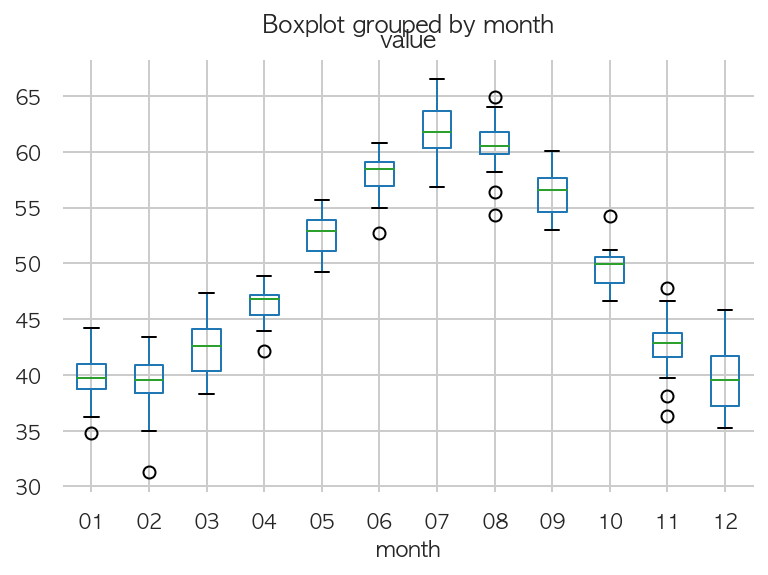

In [17]:
df_nottem.boxplot('value', 'month')
plt.show()

$x = 1 \rightarrow \hat y = w_1$ 

 - 1월달 데이터만 모아져 있는 값의 평균값(대표값)

$x = 2 \rightarrow \hat y = w_2$

$x = 3 \rightarrow \hat y = w_3$

   
$\vdots$

$x = 12 \rightarrow \hat y = w_{12}$


In [18]:
model = sm.OLS.from_formula('value ~ C(month) + 0', df_nottem)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     277.3
Date:                Wed, 26 Feb 2020   Prob (F-statistic):          2.96e-125
Time:                        13:14:35   Log-Likelihood:                -535.82
No. Observations:                 240   AIC:                             1096.
Df Residuals:                     228   BIC:                             1137.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(month)[01]    39.6950      0.518     76.691   

In [19]:
model = sm.OLS.from_formula('value ~ C(month)', df_nottem)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     277.3
Date:                Wed, 26 Feb 2020   Prob (F-statistic):          2.96e-125
Time:                        13:14:49   Log-Likelihood:                -535.82
No. Observations:                 240   AIC:                             1096.
Df Residuals:                     228   BIC:                             1137.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         39.6950      0.518     76.

---

$x = 1 \rightarrow \hat y = w_1$ 

 - 1월달 데이터만 모아져 있는 값의 평균값(대표값)

$x = 2 \rightarrow \hat y = w_1 + w_2$

 - 기준이 되는 1월달에서 2월달에는 얼마나 달라지는가?

$x = 3 \rightarrow \hat y = w_1 + w_3$

   
$\vdots$

$x = 12$

----

- 더미변수는 없고 intercept 값이 생김 .

#### Intercept         39.6950 
#### C(month)[T.02]    -0.5050 
    
    - 기준이 되는 1월달의 기온에 비해 0.5도가 낮음. 

---  

 - 기준없이 각각의 category의 의미를 가지면 Full-RANK
 - 어떠한 기준이 있고 그 기준에 따라 값이 정해지면 Reduced_RANK
 
 